In [1]:
import re
import numpy as np
import glob
import csv
import os
import math
import cv2
import matplotlib.pyplot as plt

In [2]:
# 결과 저장경로 지정
f = open("../bf_img/Result.csv", 'w', newline='')
f.write("Img, Count, PosX, PosY, area, dia, hist_var, dark_mean, bright_mean, dark_max, bright_max, dark_min, bright_min, defect_gray_min, img_gray_min, dark_perc, bright_perc, classification, area_classification, eccen_PCA, eccen_Ell, Peri_Var\n")
wr = csv.writer(f)

Text(0.5, 1.0, 'cont_draw_img ')

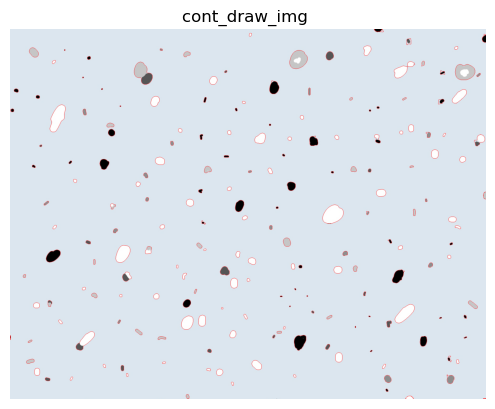

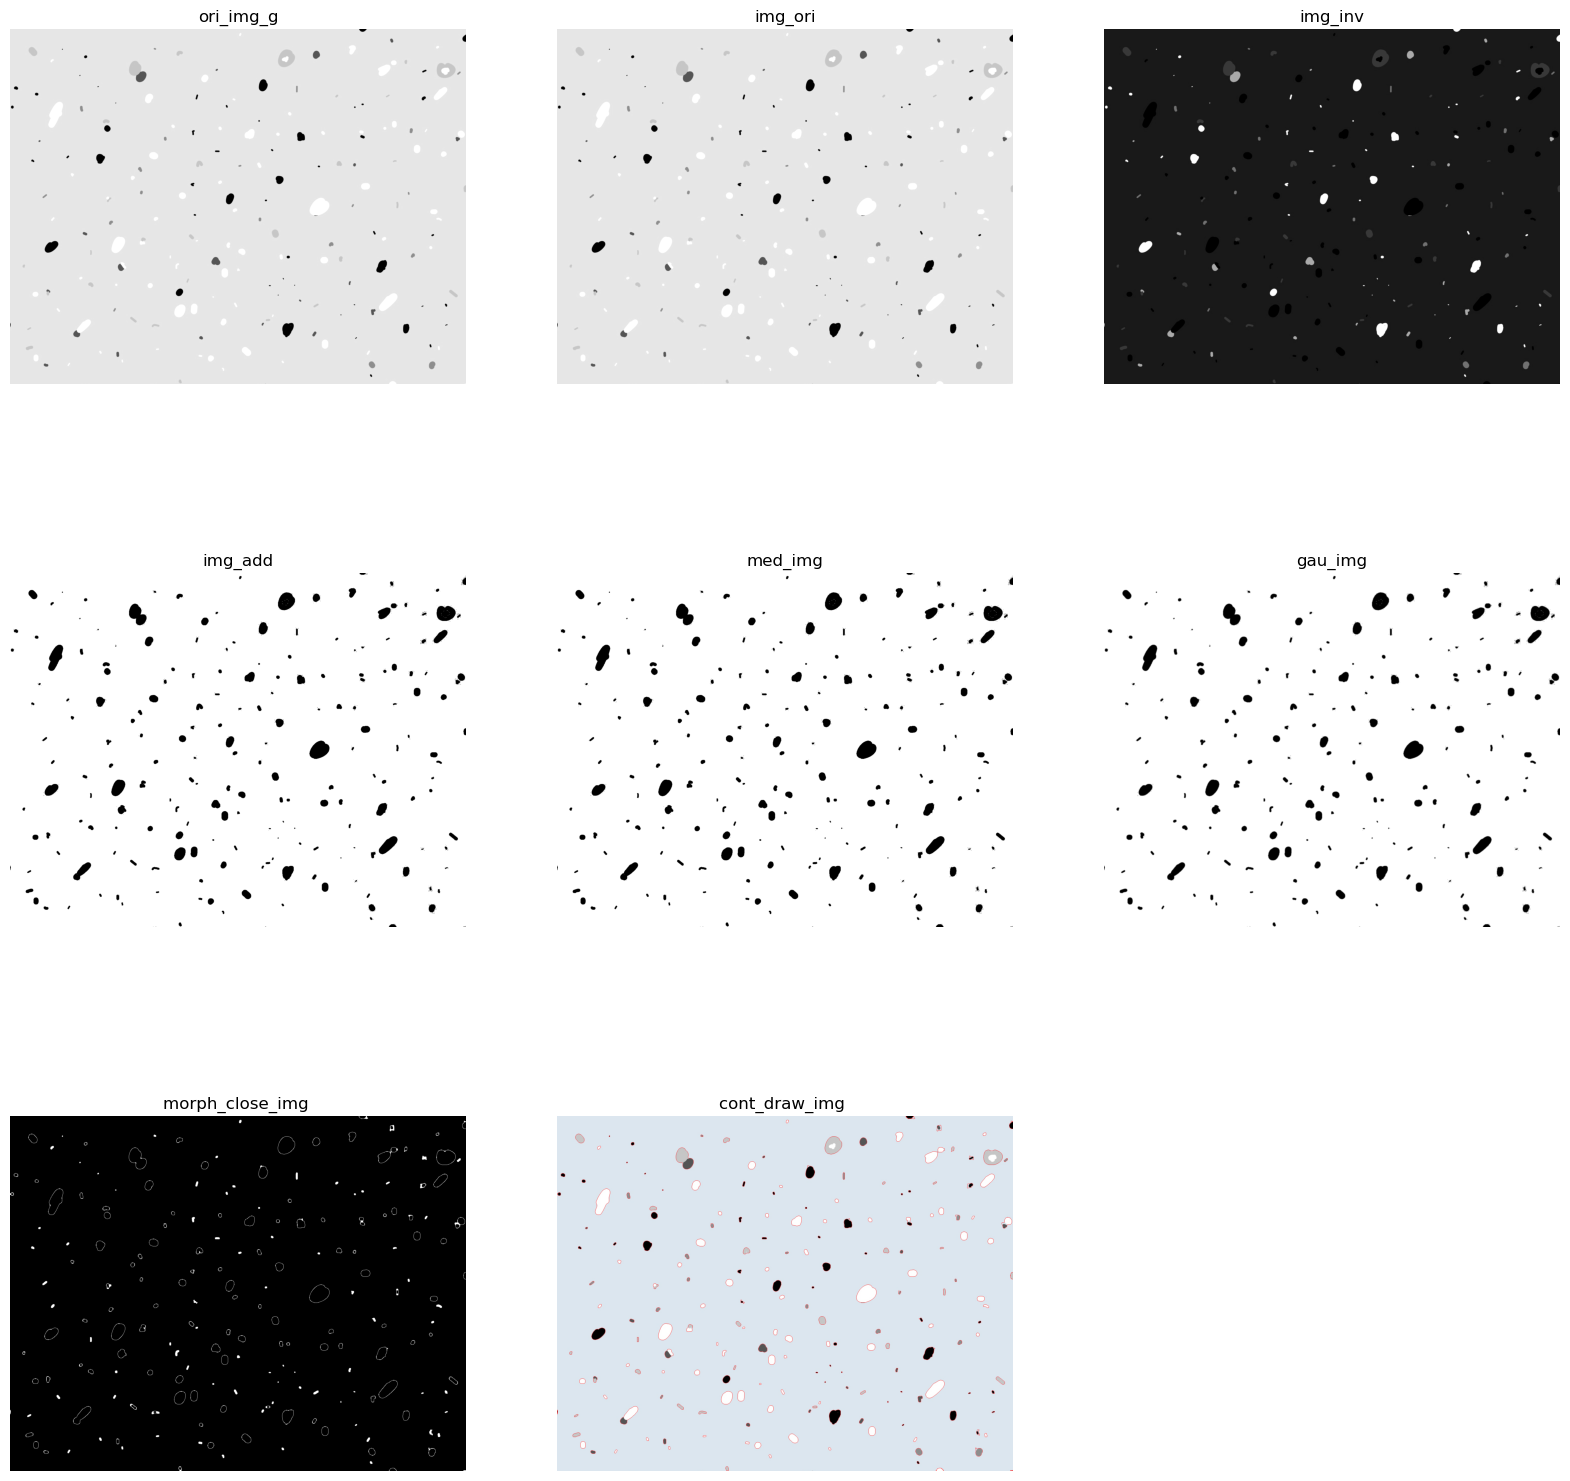

In [36]:
# 이미지 경로 지정
path = "../bf_img/"

# 이미지 목록 리스트로 반환 # 생성시간 기준으로 정렬
images = \
    [cv2.imread(file) for file in sorted(glob.glob(path+"*.JPG"),
    key=os.path.getmtime)]

image = images[0]
# image = image[250:1850, 300:2700]
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ori = img_rgb.copy()
# ori_img = img_rgb.copy()

# Crop
img = img_rgb.copy()
cropped_img = img[300:1700, 500:2300]
ori_img = cropped_img.copy()

# Color Split
img_b, img_g, img_r = cv2.split(ori_img)
ori_img_g = img_g.copy()

# Original img/ Inverse img 분리
img_ori = img_g.copy()
img_inv = 255 - img_ori

# Adaptive Threshold
block_size = 1801
C = 7
img_dark = cv2.adaptiveThreshold(img_ori, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
img_bright = cv2.adaptiveThreshold(img_inv, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
img_add = cv2.addWeighted(img_dark, 0.5, img_bright, 0.5, 0)

# Median 필터
img_median = img_add.copy()
k_med = 1
med_img = cv2.medianBlur(img_median, k_med)
# Gaussian 필터
img_gaussian = med_img.copy()
k_gau = 3
gau_sigma = 1
gau_img = cv2.GaussianBlur(img_gaussian, (k_gau, k_gau), gau_sigma)

# Canny Edge Detection
def imageEdgeCanny(image):
    return cv2.Canny(image, 0, 255)
edg_img = imageEdgeCanny(gau_img)

# Blob
def morph_close(image):
    k_morph = 7
    kernel = np.ones((k_morph, k_morph), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
morph_close_img = morph_close(edg_img).copy()

# Contours(외곽 Edge 찾기)-> Area/Position Meas.
cont_img = morph_close_img.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont_draw_img = cropped_img.copy()
# cont_draw_img = np.zeros((1400, 1800))
for cnt in contours:
    cv2.drawContours(cont_draw_img, [cnt], -1, (255, 0, 0), 1)

plt.imshow(cont_draw_img)
plt.axis('off')
plt.title('cont_draw_img ')


plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1) # (행의 수, 열의 수, 현재 위치)
plt.axis('off')
plt.imshow(ori_img_g, cmap='gray')
plt.title('ori_img_g')

plt.subplot(3, 3, 2)
plt.imshow(img_ori, cmap='gray')
plt.axis('off')
plt.title('img_ori')

plt.subplot(3, 3, 3)
plt.imshow(img_inv, cmap='gray')
plt.axis('off')
plt.title('img_inv')

plt.subplot(3, 3, 4)
plt.imshow(img_add, cmap='gray')
plt.axis('off')
plt.title('img_add')

plt.subplot(3, 3, 5) 
plt.imshow(med_img, cmap='gray')
plt.axis('off')
plt.title('med_img')

plt.subplot(3, 3, 6)
plt.imshow(gau_img, cmap='gray')
plt.axis('off')
plt.title('gau_img')

plt.subplot(3, 3, 7)
plt.imshow(morph_close_img , cmap='gray')
plt.axis('off')
plt.title('morph_close_img ')

plt.subplot(3, 3, 8)
plt.imshow(cont_draw_img)
plt.axis('off')
plt.title('cont_draw_img ')
